# Plot surface currents, wind speeds and salinity for SOG point 

In [1]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [2]:
# time period to plot up
start_time = '30 may 2015'
end_time = '22 jun 2015'

# time period of model simulations to overlay on longer time series
start_model = '5 dec 2017'
end_model = '12 dec 2017'

# location to plot
loc = 'SOG'

# output netcdf to save data to
in_current_netcdf = loc + '_current_timeseries_' + ''.join(start_time.split()) + '_' + ''.join(end_time.split()) + '.nc'
in_wind_netcdf    = loc + '_wind_timeseries_' + ''.join(start_time.split()) + '_' + ''.join(end_time.split()) + '.nc'
in_salty_netcdf   = loc + '_salinity_timeseries_' + ''.join(start_time.split()) + '_' + ''.join(end_time.split()) + '.nc'

### load files for plotting

In [3]:
sfc_current = xr.open_dataset(in_current_netcdf)
wind = xr.open_dataset(in_wind_netcdf)
salty = xr.open_dataset(in_salty_netcdf)

In [4]:
sfc_current

<xarray.Dataset>
Dimensions:        (time: 576, time_counter: 576)
Coordinates:
    depthu         float32 ...
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) datetime64[ns] 2015-05-30T00:30:00 ...
    time           (time_counter) datetime64[ns] ...
Data variables:
    uspd           (time) float32 ...

In [5]:
wind

<xarray.Dataset>
Dimensions:       (time: 576, time_counter: 576)
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2015-05-30 ...
    time          (time_counter) datetime64[ns] ...
Data variables:
    wspd          (time) float32 ...

In [6]:
salty

<xarray.Dataset>
Dimensions:        (time: 576, time_counter: 576)
Coordinates:
    deptht         float32 ...
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) datetime64[ns] 2015-05-30T00:30:00 ...
    time           (time_counter) datetime64[ns] ...
Data variables:
    salinity       (time) float32 ...

In [30]:
sfc_current.uspd

<xarray.DataArray 'uspd' (time: 576)>
array([ 0.785415,  0.706093,  0.645309, ...,  0.236897,  0.237069,  0.332681], dtype=float32)
Coordinates:
    depthu   float32 ...
Dimensions without coordinates: time

In [32]:
sfc_current

<xarray.Dataset>
Dimensions:        (time: 576, time_counter: 576)
Coordinates:
    depthu         float32 ...
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) datetime64[ns] 2015-05-30T00:30:00 ...
    time           (time_counter) datetime64[ns] 2015-05-30T00:30:00 ...
Data variables:
    uspd           (time) float32 0.785415 0.706093 0.645309 0.579684 ...

In [31]:
sfc_current_model = sfc_current.uspd.sel(time=[1])

In [35]:
sfc_current_model = sfc_current.sel(time='2015-05-30T00:30:00')

ValueError: cannot use a dict-like object for selection on a dimension that does not have a MultiIndex

In [29]:
# extract time period of actual model run
sfc_current_model = sfc_current.uspd.sel(time='2015-05-30T00:30:00.000000000')

TypeError: invalid indexer array, does not have integer dtype: array('2015-05-30T00:30:00.000000000',
      dtype='<U29')

In [24]:
# calculate a running average 
uspd_avg = sfc_current.uspd.rolling(time=12,center=True).mean()
wspd_avg = wind.wspd.rolling(time=12,center=True).mean()
salty_avg = salty.salinity.rolling(time=12,center=True).mean()

### Plot current speed

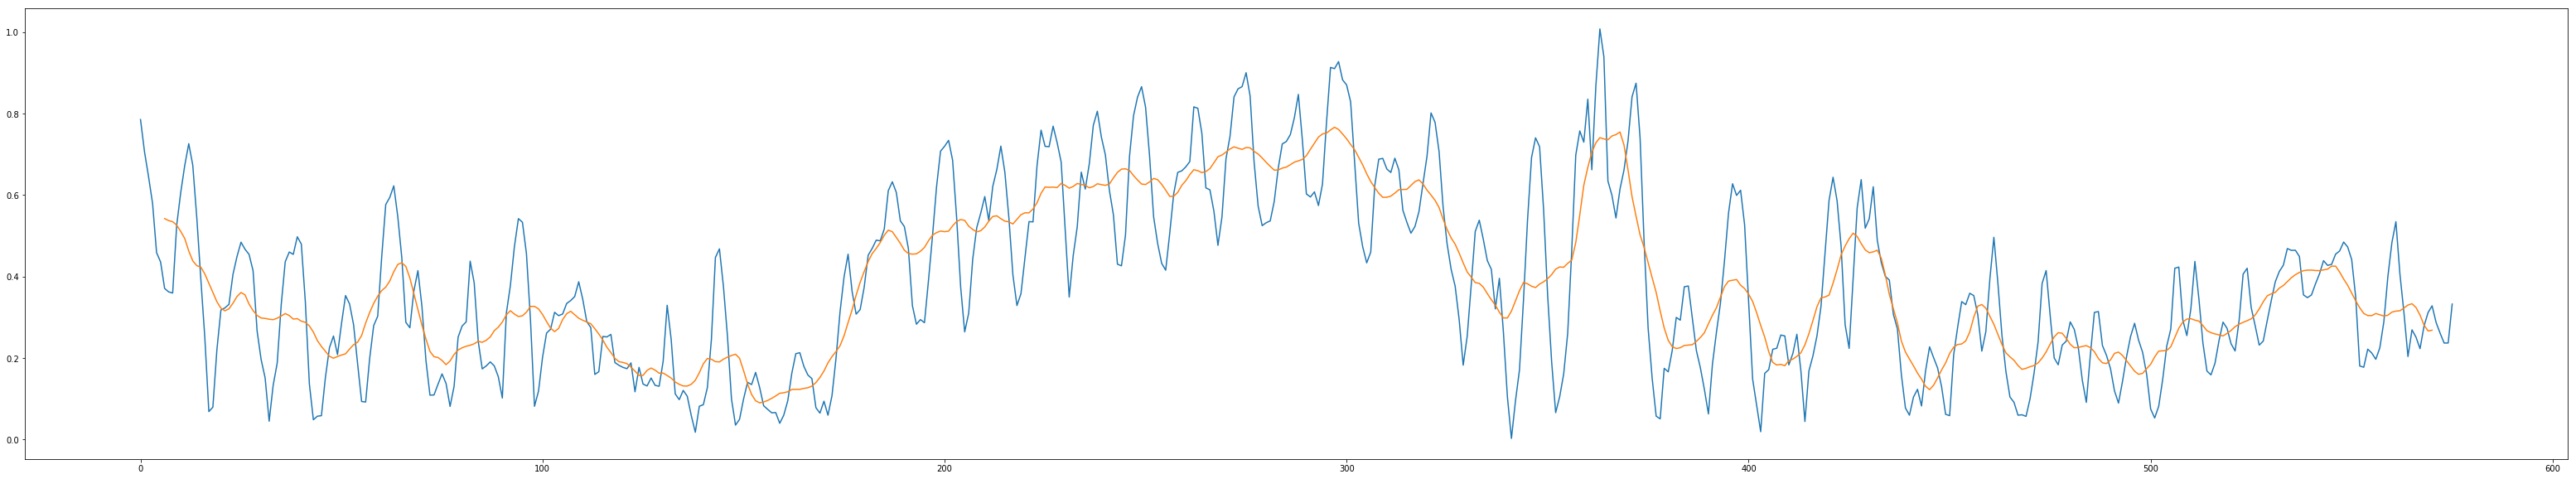

In [9]:
fig = plt.figure(figsize=(55,10))
ax1 = fig.add_subplot(111)
speed_ax = ax1.plot(sfc_current.uspd)
ra_speed_ax = ax1.plot(uspd_avg)